# Irony Detection in English

#### The goal of this project consists in training models capable handling classificating irony in  English  tweet. It has two different tasks.

* Task1: Create a Model for perform a binary classification if a tweet is ironic or not
* Task2: Create a Model to determine the type of irony

This project was originally introduced as a task for a Machine Learning competition, the [SemEval2018](https://competitions.codalab.org/competitions/17468#participate)

Using different classification techniques we intend to find the best model that performs better in  each of the two purposed tasks.

This project was made by 3 students as part of the Artificial Intelligence course at FEUP. You are free to use the code for any purpose, but beware that this is just an academia project in an introductory course to Artificial Intelligence.

* André Malheiro up201706280@fe.up.pt
* Diogo Gomes up201806572@fe.up.pt
* Rúben Almeida up201704618@fe.up.pt

Libraries Used: 
* Pandas
* Numpy
* Scikit-learn
* Matplotlib
* nltk

### Datasets:

The data sets for this project are not owned by our group, they are supplied by SemEval competition and are free to use for academic purposes only outside of the competition.

Both the tasks use the same two datasets, but marked in the proprer way according to the task. The first one is marked in binary way, where 1 stands for ironic tweet and 0 for non ironic tweet

About the datasets, one is marked for train and the other for testing. Originally they were in .txt format, but in order to simplify the work of the pandas library, we manually converted those files to .csv

**SemEval organization themselves already provide a division of the dataset in two subsets, a test dataset and a train dataset.**

This division is useful for the final evaluation of our work. Since the competition was in 2018, the ranking of the participants for that dataset is already public. This way we are able to keep track of which place we could score in that professional competition

![title](../assets/ranking.png)
##### Fig1: Ranking for task 1 of the SemEval competition

![title](../assets/ranking2.png)
##### Fig1: Ranking for task 2 of the SemEval competition

#### Problem with word delimeter

Pandas is a library perfect for the job of reading data from a file, since it setup automaticaly the capability of seeing that data in a formatted organized way.

Pandas has specific functions to read from different formats. The datasets are originally in .txt format, a conversion for either JSON or CSV, formats accepted by Pandas needed to be done. 4000 tweets in JSON would turn the data file really dense in information.
Since we are dealing with just 2 attributes, it is pointless to make our life harder in this step. 

**We chosed .csv format to represent the data**

CSV files dealing with text rise other problem, the fact that people use comma in their texts, pandas. So we introduce other delimiter,'\t', so we are able to do the task

## Task 1: Ironic vs. non-ironic

### Create a classificator that could handle proprely this binary classification task.

In this first task we will use the dataset split the way it was provided by the competition

In the second task we will use other techniques and apply other techniques like **cross validation**

In [4]:
from IPython.display import display, HTML
import pandas
import numpy

train_data=pandas.read_csv('data/task1/train.csv',  delimiter = '\t', quoting = 3, encoding="utf-8")
test_data=pandas.read_csv('data/task1/test-labeled.csv', delimiter = '\t', quoting = 3, encoding="utf-8")

In [5]:
train_data.head()

,label,tweet
0,1,Sweet United Nations video. Just in time for C...
1,1,@mrdahl87 We are rumored to have talked to Erv...
2,1,Hey there! Nice to see you Minnesota/ND Winter...
3,0,3 episodes left I'm dying over here
4,1,"""I can't breathe!"" was chosen as the most nota..."


In [6]:
test_data.head()

,label,tweet
0,0,@Callisto1947 Can U Help?||More conservatives ...
1,1,"Just walked in to #Starbucks and asked for a ""..."
2,0,#NOT GONNA WIN http://t.co/Mc9ebqjAqj
3,0,@mickymantell He is exactly that sort of perso...
4,1,So much #sarcasm at work mate 10/10 #boring 10...


### Analising the datasets

Some initial considerations should be done in order to ensure the quality of the data. The data provided doesn't contain blank fields. 

Testing proprelly the existance of duplicates in the datasets would require knowledge outside the scope of the course, so we assume that there aren't duplicate data in the dataset.


**One very important consideration regarding the data is the possibility of the dataset being unbalanced**. With both of our data sets loaded, we can use **Matplotlib** to determine if that consideration holds.

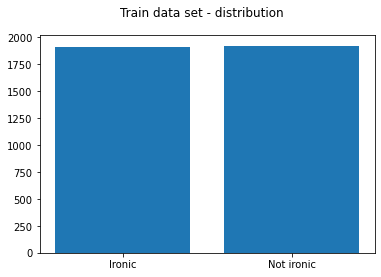

Ironic tweets -  1911
Non Ironic tweets -  1923
Percentage of ironic tweets -  49.84350547730829


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
train_data_ntrue=train_data['label'].sum()
train_data_nfalse=train_data['label'].count()-train_data_ntrue
values=[train_data_ntrue,train_data_nfalse]
names=['Ironic','Not ironic']
plt.bar(names,values)
plt.suptitle('Train data set - distribution')
plt.show()
print('Ironic tweets - ',train_data_ntrue)
print('Non Ironic tweets - ',train_data_nfalse)
print('Percentage of ironic tweets - ',train_data_ntrue*1.0/train_data['label'].count()*100.0)

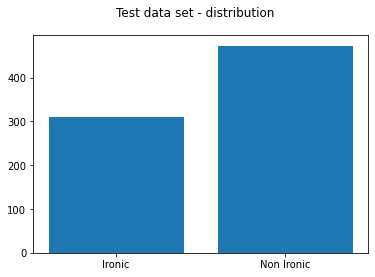

Ironic tweets -  311
Non Ironic tweets -  473
Percentage of ironic tweets -  39.66836734693878


In [8]:
test_data_ntrue=test_data['label'].sum()
test_data_nfalse=test_data['label'].count()-test_data_ntrue
values=[test_data_ntrue,test_data_nfalse]
names=['Ironic','Non Ironic']
plt.suptitle('Test data set - distribution')
plt.bar(names,values)
plt.show()
print('Ironic tweets - ',test_data_ntrue)
print('Non Ironic tweets - ',test_data_nfalse)
print('Percentage of ironic tweets - ',test_data_ntrue*1.0/test_data['label'].count()*100.0)

#### Conclusion:

While the training data is **balanced** in the number of ironic and non ironic tweets, the same can't be said for the test data set originnaly provided by the organization.

In our second graph, its visually palpable that the number of non ironic tweets is significantly larger.

### Bag of words

Now that we have the data in a pandas data set we need to proceed our path of finding an accurate model to identify ironic tweets. For that we need to parse our tweets to a **bag of words** model format.

A bag of words is a model which tweet will see their words tokenized and counted by a specified formula. Where we have 2 essential paths that we can follow:

* Use a simple counting of words.
* Use the TF-IDF measure

##### The process of getting as input the raw text and output a bag of words is called **Vectorization**

## Initial analysis


There are two important questions that we need to be able to answer in order to proceed in our model design and also a raw analysis without pre processing, this way we can estimate the level of pre processing we need in order to achieve a reasonable answer and also keep track of degree of improvement we have in each attempt we try.

* Does TF-IDF measure perform better that a simple counting of words?
* How good performs the simplest model in our dataset without preprocessing?

In order to have a objective evaluation criteria to our final answer to this problem, it is important to make a fast initial analysis to the data without any kind of pre processing to the data, using the simplest model possible, a **Gaussian Naïve Bayes**.

### Simple Word Counter Vetorization

#### Train Data

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', lowercase=False)

X_train=count_vectorizer.fit_transform(train_data['tweet']).toarray()
y_train=train_data['label']

#### Test Data

In [10]:
# Here we just Transform. Because the vocabulary is the one from the test set
X_test=count_vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

#### Model execution

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

classificator=GaussianNB()

classificator.fit(X_train,y_train)
#Predicition
y_predicted=classificator.predict(X_test)



#Metrics Raw
accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')


initial_word_count_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

### TF-IDF Vetorization

#### Train Data

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', lowercase=False)

X_train=tf_idf_vectorizer.fit_transform(train_data['tweet']).toarray()
y_train=train_data['label']

#### Test Data

In [13]:
X_test=tf_idf_vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

#### Model execution

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

classificator=GaussianNB()

classificator.fit(X_train,y_train)
#Predicition
y_predicted=classificator.predict(X_test)



#Metrics Raw
accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')


initial_tf_idf_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

### Initial Analysis conclusion:

* The differences between the competition results and our naive model are relevant. Preprocessing of data is required to improve this values. Other models techniques should also be used.


* Other element relevant is that using simple word counting or TF-IDF doesn't produce any kind of relevant difference in the results achieved. For that reason **TF-IDF will hold**


* One naive classificator without pre processing is just a random classifier. It's correctness because of the randomness is around 50% as expected


#### Simple Word Counting

In [15]:
initial_word_count_conclusion

,Our Results,Winners Result
Accuracy,0.510204,0.7347
Precision,0.556403,0.6304
F1-Value,0.509943,0.8006


#### TF-IDF

In [16]:
initial_tf_idf_conclusion

,Our Results,Winners Result
Accuracy,0.514031,0.7347
Precision,0.550978,0.6304
F1-Value,0.516916,0.8006


#### Initial Vocabulary 
Without any pre processing the vectorization of the raw data has the following number of words:

In [17]:
print(len(tf_idf_vectorizer.vocabulary_))

14042


**This would create an input matrix with 14042 collumns. That number is not reasonable for no algorithm. Preprocessing outh to reduce this value**

## Data Preprocessing Pipeline

The downfall of the initial results can be easily explained by multiple reasons:

* We are dealing social network data. That data contains lots of useless information like links, mentions or emojis and also lots of slangs and non standard vocabulary

* Didn't apply any type of Stemming or Lemmatization

* Used a simple Gaussian naïve Bayes rather than a complex neural network.

* Used the embedded tokenizer of sci kit learn rather than dedicated ones.

* The initial vocabulary is very large. 14k words. This decreases perfomance and increases overfitting to the train data.

* A final problem that could be related with the poor perfomance of the initial model is the traditional downfalls of NLP algorithms in finding contraditions. Irony many times has contradictions implied.



#### Remove Web Hyperlinks from tweets

In [18]:
train_data['tweet']=train_data['tweet'].str.replace('http\S+|www.\S+', '', case=False)

#### Normalization of Twitter mentions

In twitter is mandatory to mention the person that we reply with their personal nickname. In this Social Network this mentions are done using "@" followed by a single word that identifies the nickname

In [19]:
train_data['tweet']=train_data['tweet'].str.replace('@\S+', '', case=False)

#### Remove Numbers from the tweets

Numbers don't introduce power to a language of ironic tweets.

In [20]:
train_data['tweet']=train_data['tweet'].str.replace('\d+', '', case=False)

#### Remove Hashtags

Treat Hashtags as simple words by removing the "#" before them

In [21]:
train_data['tweet']=train_data['tweet'].str.replace('#', '', case=False)

#### Convert emojis and emoticons to text

For this job we use one of multiple open source library for the job, the choosed emoji because it was the best rated in the web

In [22]:
import emoji
import re

emoji_result=[]

for i in range(len(train_data)):
    demojize_result=emoji.demojize(train_data['tweet'][i])
    # Remove the ":" from the convertion made by emoji
    demojize_result=re.sub(":", " ", demojize_result)
    demojize_result=re.sub("_", " ", demojize_result)
    demojize_result=re.sub("-", " ", demojize_result)
    train_data['tweet'][i]=demojize_result

<ipython-input-22-8fa42c2dd129>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tweet'][i]=demojize_result


### Contradictions

Contractions is a native library of python that deals with a sharp task in NLP in English Language. Words like "Can't" would generate two tokens. To avoids this, we should convert this cases for "Can not"

In [23]:
import contractions

for i in range(len(train_data)):
    train_data['tweet'][i]=contractions.fix(train_data['tweet'][i])

<ipython-input-23-731702bef29d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tweet'][i]=contractions.fix(train_data['tweet'][i])


### Lemmatization
According with Wiki Lemmatization is: "In computational linguistics, lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning."

In [24]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

lemmatization_result = []

for i in range(len(train_data)):
    tweet = lemmatizer.lemmatize(train_data['tweet'][i])
    lemmatization_result.append(tweet)

### Tokenization and Stemming with normalization of Uppercase words to Lowercase.

Goal is to reduce the vocabulary to the absolutely necessary

In [25]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus = []

for i in range(len(lemmatization_result)):
    # get review and remove non alpha chars
    tweet = re.sub('[^\w_\w]', ' ', lemmatization_result[i])
    # to lower-case and tokenize
    tweet = tweet.lower().split()
    # stemming and stop word removal
    tweet = ' '.join([ps.stem(w) for w in tweet if not w in set(stopwords.words('english'))])
    corpus.append(tweet)

* After the Pre Processing pipeline the vocabulary usefull was reduce to 7588 words a decrese of 50%. This decrease will be usefull to boost the performance of the models

In [26]:
_dummy_vectorizer=TfidfVectorizer()
_dummy_vectorizer.fit_transform(corpus).toarray()

print(len(_dummy_vectorizer.vocabulary_))

7588


### The  Vocabulary Dillema

The perfomance of the algorithms is dependent of the size of the vocabulary. From the analysis we found the optimum value is 800 words

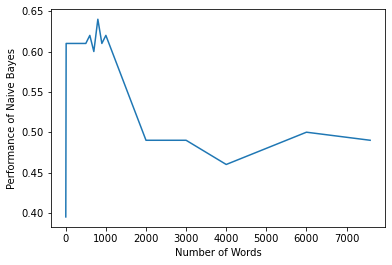

In [27]:
import matplotlib.pyplot as plt

xpoints = numpy.array([1,10,100,200,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7588])
ypoints = numpy.array([0.395, 0.61,0.61,0.61,0.61,0.62,0.60,0.64,0.61,0.62,0.49,0.49,0.46,0.48,0.50,0.49])

plt.plot(xpoints, ypoints)
plt.xlabel("Number of Words")
plt.ylabel("Performance of Naive Bayes")
plt.show()

#### Naive Bayes

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       473
           1       0.55      0.50      0.53       311

    accuracy                           0.64       784
   macro avg       0.62      0.62      0.62       784
weighted avg       0.64      0.64      0.64       784

           Our Results  Winners Result
Accuracy      0.640306          0.7347
Precision     0.635646          0.6304
F1-Value      0.637271          0.8006


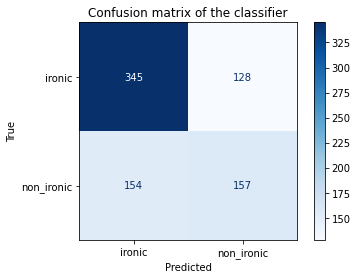

In [28]:
classificator=GaussianNB()

X_train,y_train,X_test,y_test=refresh_data()

classificator.fit(X_train,y_train)

y_predicted=classificator.predict(X_test)

print_stats()

ROC AUC=0.662


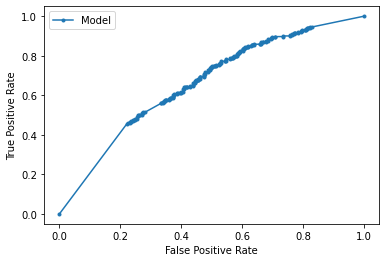

In [38]:
X_train,y_train,X_test,y_test=refresh_data()

classificator=GaussianNB()
classificator.fit(X_train,y_train)

draw_roc_curve(classificator,X_test,y_test)

#### Neural Network

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       473
           1       0.58      0.51      0.54       311

    accuracy                           0.66       784
   macro avg       0.64      0.64      0.64       784
weighted avg       0.65      0.66      0.66       784

           Our Results  Winners Result
Accuracy      0.660714          0.7347
Precision     0.654892          0.6304
F1-Value      0.656227          0.8006


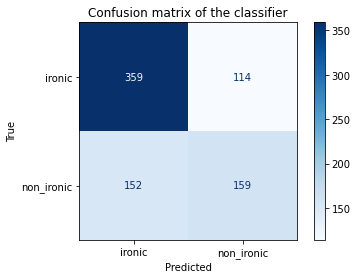

In [39]:
# Neural Network
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


X_train,y_train,X_test,y_test=refresh_data()

scaler = StandardScaler()
classificator = MLPClassifier(max_iter=1500,activation='relu',solver='adam')

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


classificator.fit(X_train, y_train)
y_predicted = classificator.predict(X_test)

print_stats()

ROC AUC=0.671


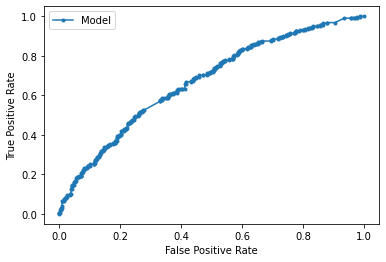

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

X_train,y_train,X_test,y_test=refresh_data()

scaler = StandardScaler()
classificator = MLPClassifier(max_iter=1500,activation='relu',solver='adam')

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


classificator.fit(X_train, y_train)

draw_roc_curve(classificator,X_test,y_test)

#### Decision Tree

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       473
           1       0.48      0.50      0.49       311

    accuracy                           0.59       784
   macro avg       0.57      0.57      0.57       784
weighted avg       0.59      0.59      0.59       784

           Our Results  Winners Result
Accuracy      0.590561          0.7347
Precision     0.592621          0.6304
F1-Value      0.591515          0.8006


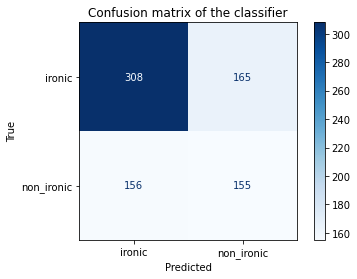

In [41]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

X_train,y_train,X_test,y_test=refresh_data()

classificator = DecisionTreeClassifier()
classificator.fit(X_train, y_train)
y_predicted = classificator.predict(X_test)

print_stats()

ROC AUC=0.577


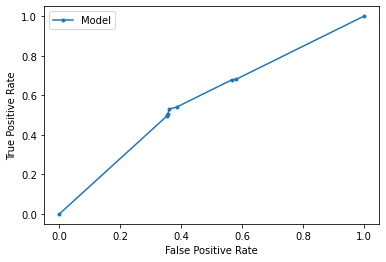

In [42]:
from sklearn.tree import DecisionTreeClassifier

X_train,y_train,X_test,y_test=refresh_data()

classificator = DecisionTreeClassifier()
classificator.fit(X_train, y_train)

draw_roc_curve(classificator,X_test,y_test)

#### K-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       473
           1       0.50      0.42      0.46       311

    accuracy                           0.60       784
   macro avg       0.58      0.57      0.57       784
weighted avg       0.59      0.60      0.60       784

           Our Results  Winners Result
Accuracy      0.603316          0.7347
Precision     0.593618          0.6304
F1-Value      0.596123          0.8006


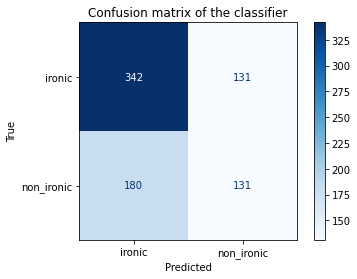

In [43]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

X_train,y_train,X_test,y_test=refresh_data()

classificator = KNeighborsClassifier()
classificator.fit(X_train, y_train)
y_predicted = classificator.predict(X_test)

print_stats()

ROC AUC=0.562


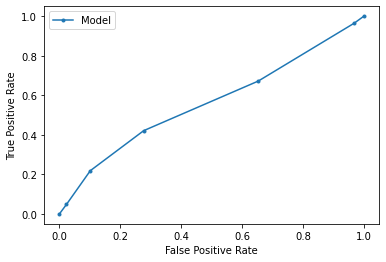

In [44]:
from sklearn.neighbors import KNeighborsClassifier

X_train,y_train,X_test,y_test=refresh_data()

classificator = KNeighborsClassifier()
classificator.fit(X_train, y_train)

draw_roc_curve(classificator,X_test,y_test)

#### SVM

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       473
           1       0.58      0.54      0.56       311

    accuracy                           0.66       784
   macro avg       0.65      0.64      0.64       784
weighted avg       0.66      0.66      0.66       784

           Our Results  Winners Result
Accuracy      0.664541          0.7347
Precision     0.660493          0.6304
F1-Value      0.661835          0.8006


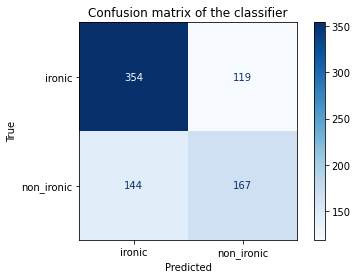

In [45]:
from sklearn.svm import SVC

X_train,y_train,X_test,y_test=refresh_data()

classificator = SVC(probability=True)
classificator.fit(X_train, y_train)
y_predicted=classificator.predict(X_test)

print_stats()

ROC AUC=0.675


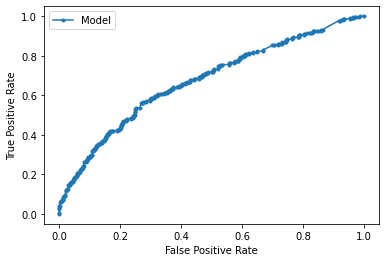

In [46]:
from sklearn.svm import SVC

X_train,y_train,X_test,y_test=refresh_data()

classificator = SVC(probability=True)
classificator.fit(X_train, y_train)

draw_roc_curve(classificator,X_test,y_test)

#### Random Forest

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       473
           1       0.52      0.54      0.53       311

    accuracy                           0.62       784
   macro avg       0.60      0.60      0.60       784
weighted avg       0.62      0.62      0.62       784

           Our Results  Winners Result
Accuracy      0.618622          0.7347
Precision     0.621003          0.6304
F1-Value      0.619693          0.8006


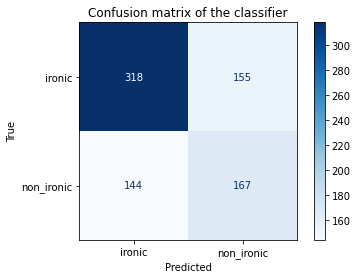

In [47]:
from sklearn.ensemble import RandomForestClassifier

X_train,y_train,X_test,y_test=refresh_data()

classificator = RandomForestClassifier()
classificator.fit(X_train, y_train)
y_predicted = classificator.predict(X_test)

print_stats()

ROC AUC=0.641


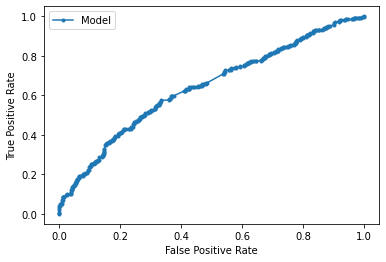

In [48]:
from sklearn.ensemble import RandomForestClassifier

X_train,y_train,X_test,y_test=refresh_data()

classificator = RandomForestClassifier()
classificator.fit(X_train, y_train)

draw_roc_curve(classificator,X_test,y_test)

### Conclusions For Task 1:

TODO

## Task 2 - Different Types of Irony

Visit the notebook clicking [here](notebook2.ipynb)

##### Helper Functions

In [49]:
def refresh_data():
    vectorizer = TfidfVectorizer(max_features = 800)

    X_train=vectorizer.fit_transform(corpus).toarray()
    y_train=train_data['label'].copy()
    
    X_test=vectorizer.transform(test_data['tweet']).toarray()
    y_test=test_data['label'].copy()
    
    return (X_train,y_train,X_test,y_test)

In [50]:
def print_stats():
    print(classification_report(y_test,y_predicted))
    accuracy_value=accuracy_score(y_test,y_predicted)
    precision_value=precision_score(y_test,y_predicted,average='weighted')
    f1_value=f1_score(y_test,y_predicted,average='weighted')

    actual_conclusion=pandas.DataFrame(
        {
        'Our Results':[accuracy_value,precision_value,f1_value],
        'Winners Result':[0.7347,0.6304,0.8006]
        } , index=['Accuracy','Precision','F1-Value'])
    
    print(actual_conclusion.head())
    
    # Confusion Matrix Plot
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predicted), display_labels=['ironic', 'non_ironic'])
    cm.plot(cmap=plt.cm.Blues)
    plt.title('Confusion matrix of the classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

def draw_roc_curve(model,testX,testy):
    lr_probs = model.predict_proba(testX)
    lr_probs = lr_probs[:, 1]
    
    lr_auc = roc_auc_score(testy, lr_probs)
    
    print('ROC AUC=%.3f' % (lr_auc))
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)        
    
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    
    pyplot.legend()
    # show the plot
    pyplot.show()    